In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


In [ ]:
directory='/content/drive/MyDrive/Sales_Data'

In [ ]:
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]
# Initialize an empty list to store DataFrames
dfs = []

# Read each CSV file into a DataFrame and append to the list
for file in csv_files:
    df = pd.read_csv(os.path.join(directory, file))
    dfs.append(df)

# Concatenate all DataFrames in the list into one DataFrame
data = pd.concat(dfs, ignore_index=True)

In [ ]:
data.shape

(186850, 6)

In [ ]:
data.isnull().sum()
data.dropna(inplace=True)
data.isnull().any()

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
dtype: bool

In [ ]:
#add month col:
data['Month']=data['Order Date'].str[0:2]

In [ ]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",08
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",08
...,...,...,...,...,...,...,...
186845,236665,Wired Headphones,1,11.99,07/20/19 16:16,"694 Meadow St, Atlanta, GA 30301",07
186846,236666,20in Monitor,1,109.99,07/31/19 20:11,"866 14th St, San Francisco, CA 94016",07
186847,236667,AAA Batteries (4-pack),1,2.99,07/17/19 22:29,"249 Cherry St, Dallas, TX 75001",07
186848,236668,Wired Headphones,1,11.99,07/30/19 19:28,"727 Wilson St, Austin, TX 73301",07


In [ ]:
type(data['Month'])


pandas.core.series.Series

In [ ]:
#clean or in month col:
data=data[data['Month'].str[0:2]!='Or']

In [ ]:
data['Month']=data['Month'].astype(int)

<ipython-input-120-a2ba1f479abd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month']=data['Month'].astype(int)


In [ ]:
#conver type to int
data['Quantity Ordered']=pd.to_numeric(data['Quantity Ordered'])
data['Price Each']=pd.to_numeric(data['Price Each'])

<ipython-input-121-1a0a66e40b05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Quantity Ordered']=pd.to_numeric(data['Quantity Ordered'])
<ipython-input-121-1a0a66e40b05>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price Each']=pd.to_numeric(data['Price Each'])


In [ ]:
#add sales table qt* price
data['Sales']=data['Quantity Ordered']*data['Price Each']

<ipython-input-122-098142dcfa22>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sales']=data['Quantity Ordered']*data['Price Each']


In [ ]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68


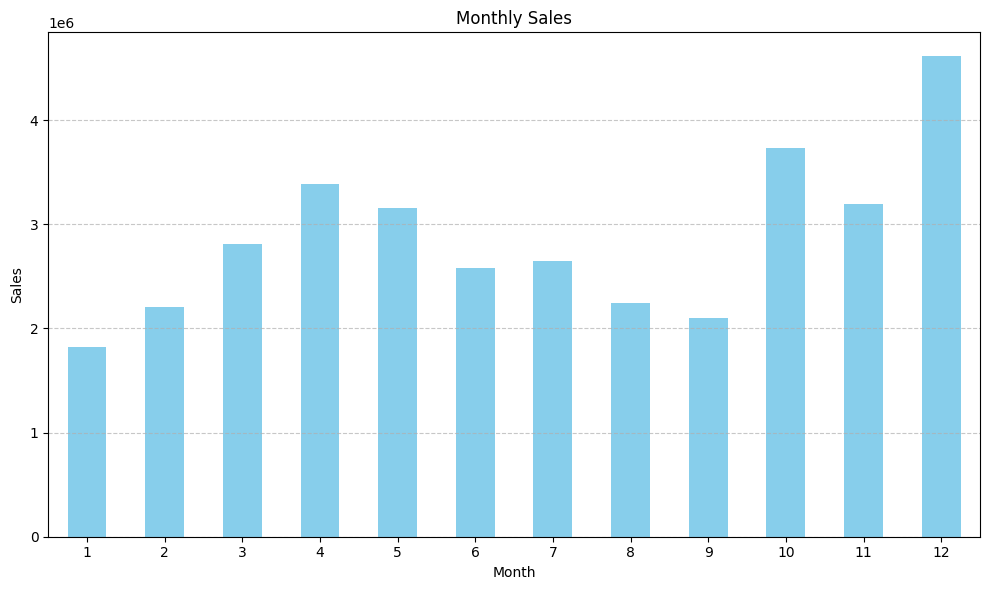

In [ ]:
#find highest  monthly sales
monthly_sales=data.groupby('Month')['Sales'].sum()
# Plot the bar chart
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68


In [ ]:
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales'],
      dtype='object')

In [ ]:
#which city had best sales
data['City']=data['Purchase Address'].apply(lambda x:x.split(",")[1])

<ipython-input-127-b9b37d32dc7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['City']=data['Purchase Address'].apply(lambda x:x.split(",")[1])


In [ ]:
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,Portland
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,New York City
...,...,...,...,...,...,...,...,...,...
186845,236665,Wired Headphones,1,11.99,07/20/19 16:16,"694 Meadow St, Atlanta, GA 30301",7,11.99,Atlanta
186846,236666,20in Monitor,1,109.99,07/31/19 20:11,"866 14th St, San Francisco, CA 94016",7,109.99,San Francisco
186847,236667,AAA Batteries (4-pack),1,2.99,07/17/19 22:29,"249 Cherry St, Dallas, TX 75001",7,2.99,Dallas
186848,236668,Wired Headphones,1,11.99,07/30/19 19:28,"727 Wilson St, Austin, TX 73301",7,11.99,Austin


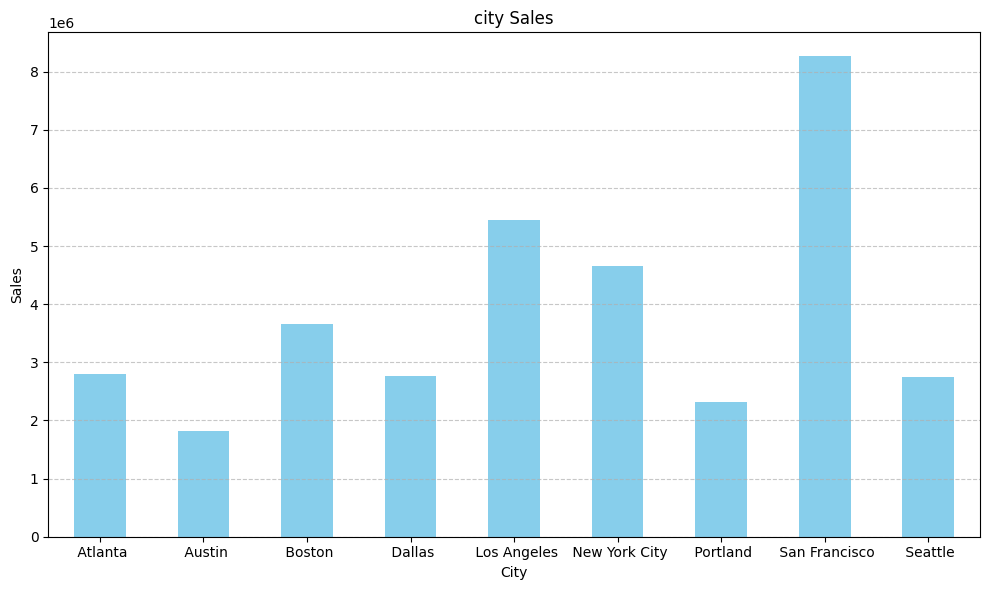

In [ ]:
city_sales=data.groupby('City')['Sales'].sum()
# Plot the bar chart
plt.figure(figsize=(10, 6))
city_sales.plot(kind='bar', color='skyblue')
plt.title('city Sales')
plt.xlabel('City')
plt.ylabel('Sales')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,Portland
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,New York City


In [ ]:
#what time should we display advertiselimen to maximize customer buying product
data['Hour']=data['Order Date'].apply(lambda x:x.split(" ")[1])

<ipython-input-131-dc9b71fe4f33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Hour']=data['Order Date'].apply(lambda x:x.split(" ")[1])


In [ ]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle,22:21
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas,15:11
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,Portland,14:40
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles,20:59
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,New York City,19:53


In [ ]:
data['Hour']=data['Hour'].str[0:2]

<ipython-input-133-0e60e62b07ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Hour']=data['Hour'].str[0:2]


In [ ]:
data.head()
data['Hour']=data['Hour'].astype(int)

<ipython-input-134-118d525cd698>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Hour']=data['Hour'].astype(int)


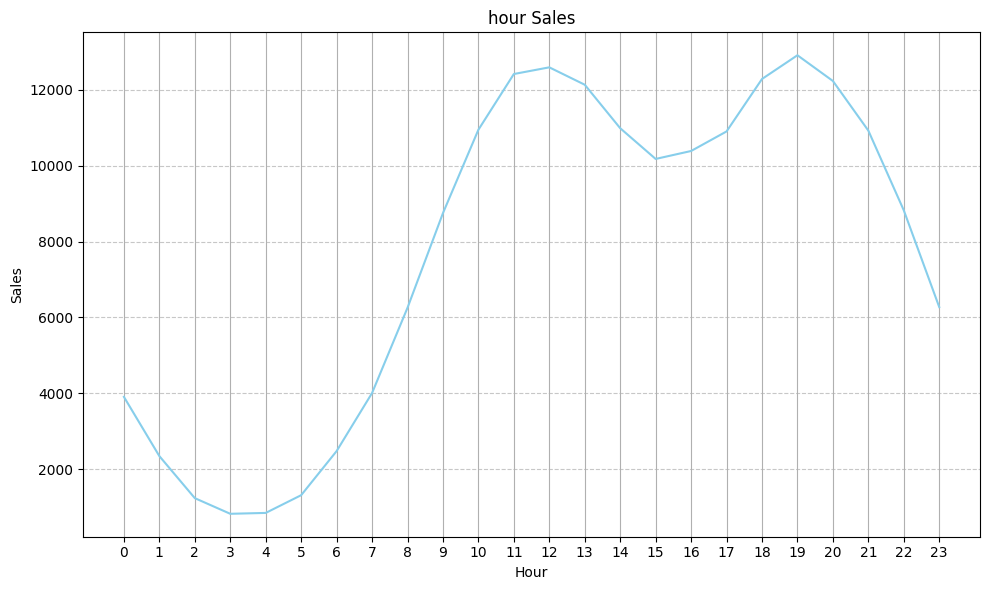

In [ ]:
hour_sales=data.groupby('Hour')[ 'Sales'].count()
plt.figure(figsize=(10, 6))
index=data['Hour'].unique()
hour_sales.plot(kind='line', color='skyblue')
plt.title('hour Sales')
plt.xlabel('Hour')
plt.ylabel('Sales')
plt.grid()
plt.xticks(index)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
data[data['Order ID'].duplicated(keep=False)]
data['Grouped']=data.groupby('Order ID')['Product'].transform(lambda x: ',' .join(x))
data.head()


<ipython-input-138-55a6ced029b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Grouped']=data.groupby('Order ID')['Product'].transform(lambda x: ',' .join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Grouped
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle,22,Wired Headphones
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas,15,Bose SoundSport Headphones
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,Portland,14,iPhone
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles,20,AA Batteries (4-pack)
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,New York City,19,AA Batteries (4-pack)


In [ ]:
data[data.duplicated(keep=False)]
data.drop_duplicates()
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Grouped
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle,22,Wired Headphones
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas,15,Bose SoundSport Headphones
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,Portland,14,iPhone
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles,20,AA Batteries (4-pack)
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,New York City,19,AA Batteries (4-pack)
...,...,...,...,...,...,...,...,...,...,...,...
186845,236665,Wired Headphones,1,11.99,07/20/19 16:16,"694 Meadow St, Atlanta, GA 30301",7,11.99,Atlanta,16,Wired Headphones
186846,236666,20in Monitor,1,109.99,07/31/19 20:11,"866 14th St, San Francisco, CA 94016",7,109.99,San Francisco,20,20in Monitor
186847,236667,AAA Batteries (4-pack),1,2.99,07/17/19 22:29,"249 Cherry St, Dallas, TX 75001",7,2.99,Dallas,22,AAA Batteries (4-pack)
186848,236668,Wired Headphones,1,11.99,07/30/19 19:28,"727 Wilson St, Austin, TX 73301",7,11.99,Austin,19,Wired Headphones


In [ ]:
from itertools import combinations
from collections import Counter
count=Counter()
for row in data['Grouped']:
  row_list=row.split(',')
  count.update(Counter(combinations(row_list,2)))

print(count)

for key,value in count.most_common(10):
  print(key,value)


Counter({('iPhone', 'Lightning Charging Cable'): 2140, ('Google Phone', 'USB-C Charging Cable'): 2116, ('iPhone', 'Wired Headphones'): 987, ('Google Phone', 'Wired Headphones'): 949, ('iPhone', 'Apple Airpods Headphones'): 799, ('Vareebadd Phone', 'USB-C Charging Cable'): 773, ('Google Phone', 'Bose SoundSport Headphones'): 503, ('USB-C Charging Cable', 'Wired Headphones'): 452, ('Vareebadd Phone', 'Wired Headphones'): 327, ('Lightning Charging Cable', 'Wired Headphones'): 253, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 214, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 211, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 182, ('Apple Airpods Headphones', 'Wired Headphones'): 170, ('Bose SoundSport Headphones', 'Wired Headphones'): 140, ('Lightning Charging Cable', 'USB-C Charging Cable'): 120, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 114, ('Lightning Charging Cable', 'Lightning Charging Cable'): 111, ('AA Batteries (4-pack)', 'Lightning Chargi

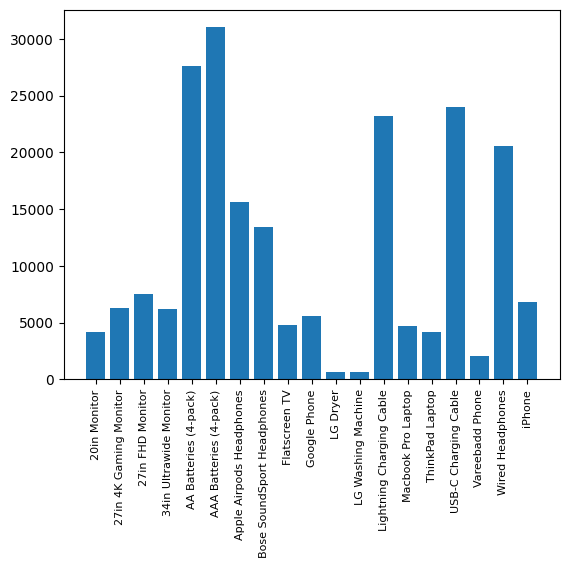

In [175]:
product_group = data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

<ipython-input-173-951d22a4f470>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)


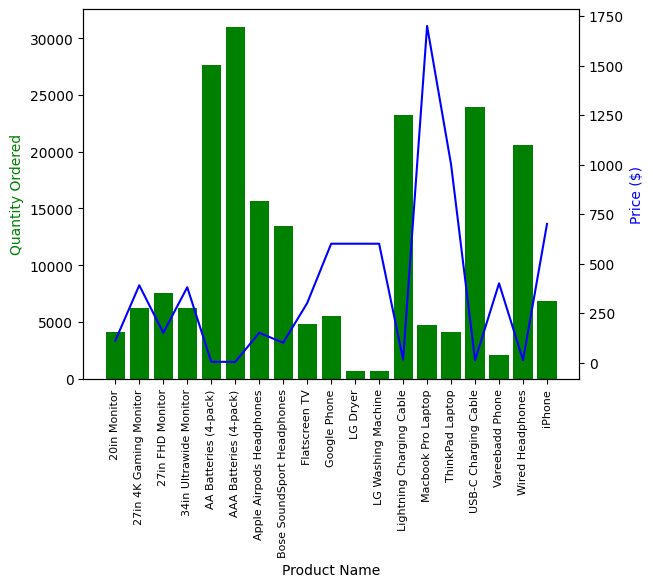

In [ ]:
#generate  price for each product
prices = data.groupby('Product')['Price Each'].mean()
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()
